<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Binary_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binary Classification

In [25]:
%%capture
#wherever we use this, we won't see the output. very useful
!pip install ipython-autotime
#to add it to colab to show the execution time
#to activate an extension we use %load_ext name before than part

In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

## 1- Data Preparation

In [24]:
%%capture
 (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print(type(train_data[0])) #it is list because opinions here have different lengths so we can not save them as numpy arrays
print(len(train_data[0]))
print(train_labels[0]) #positive or negative

(25000,)
<class 'list'>
218
1


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
#Turning my list into Tensors (Vectorizing my data)
#Multihot Encoding to make all lists having the same length
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
   results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
#Vectorizing Labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
train_labels.dtype

dtype('int64')

##2- Model

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    #we changes input shape to 10000. we input it as a list so we write it with a comma
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    #for the binary classification, last layer's activation is sigmoid
])

model.summary()
#if we do not add the input  shape to the first layer, we can not see the model summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

##3- Training

In [26]:
%load_ext autotime

time: 425 µs (started: 2024-08-26 21:03:41 +00:00)


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

start = time.time()
history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512,
          epochs=20, validation_data=(x_val, y_val))
#or we can use validation_split=0.x percent of train data
end = time.time()
print(f'Execution time: {end-start}') #showing the exact execution time
#for time calculation, we can also see the output of fit command
#we can also use autotime extension in colab and out windows

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 0.8636 - val_loss: 0.7083
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8637 - val_loss: 0.7611
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8646 - val_loss: 0.8061
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8637 - val_loss: 0.8441
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 9.4364e-04 - val_accuracy: 0.8637 - val_loss: 0.8766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 1.0000 - loss: 7.1345e-04 - val_accuracy: 0.8626 - val_loss: 0.9077
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 1.0000 - loss: 5.4667e-04 - val_accuracy: 0.8627 - val_loss: 0.9337
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 4.6585e-04 - val_accu

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

##4- Evaluation

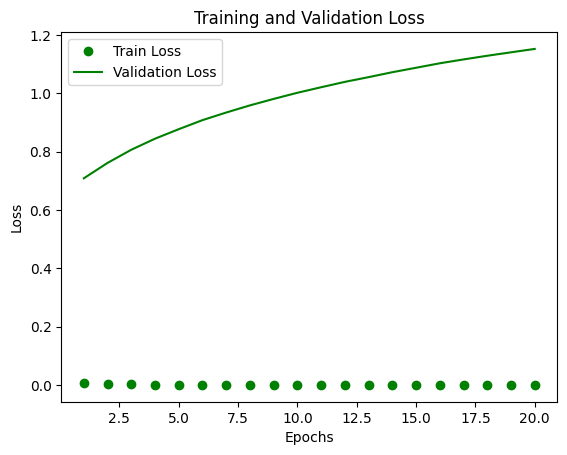

time: 295 ms (started: 2024-08-26 21:04:03 +00:00)


In [27]:
losses = history.history['loss']
val_losses = history.history['val_loss']
epochs = range (1, len(val_losses) + 1)
plt.plot(epochs, losses, 'go', label='Train Loss')
#go stands for green dots
plt.plot(epochs, val_losses, 'g', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')


plt.show()
#According to the plot, we see that we have overfitting
#Because Validation loss is going farther from 0
#We are overoptimizing our model

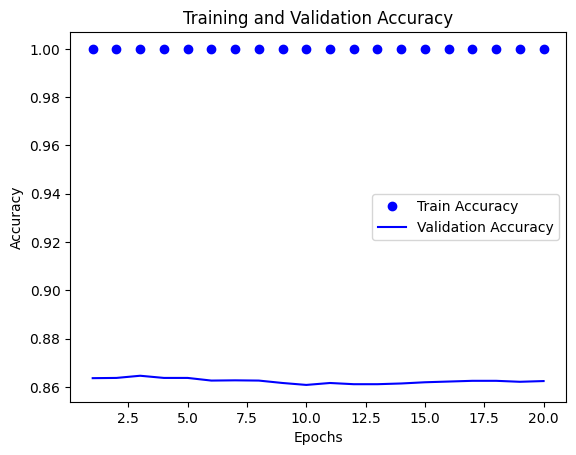

time: 323 ms (started: 2024-08-26 21:04:13 +00:00)


In [28]:
accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
plt.plot(epochs, accuracies, 'bo', label='Train Accuracy')
#go stands for green dots
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')


plt.show()
#According to the plot, we see that we have overfitting
#Because Validation Accuracy is going farther from 1
#We are overoptimizing our model

In [29]:
%unload_ext autotime
#de-activating extension

In [30]:
#Model Evaluation method1
model.evaluate(x_test, y_test)
#evaluation the model

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8470 - loss: 1.2664


[1.241836667060852, 0.8492400050163269]

In [16]:
#Model Evaluation method2
preds = model.predict(x_test)
#building a preds var of predictions

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [17]:
preds

array([[0.00653848],
       [0.9999998 ],
       [0.9120738 ],
       ...,
       [0.00109897],
       [0.0066241 ],
       [0.8744478 ]], dtype=float32)

In [18]:
#changing preds to be comparable with y_test
preds[preds<0.5] = 0
preds[preds>=0.5] =1
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [19]:
#Using sklearn
from sklearn.metrics import classification_report

#using print and classification_report
print(classification_report(y_test, preds, target_names=('Negative', 'Positive')))

#We changed 0 and 1 by target_names

              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86     12500
    Positive       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

